In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv("Raymondu.csv")
df.loc[(df["Close Price"] < df["Lower Bollinger"]),"Call"] = "Buy"
df.loc[(df["Close Price"] > df["Lower Bollinger"]) & (df["Close Price"] < df["Middle Bollinger"]),"Call"] = "Hold Buy"
df.loc[(df["Close Price"] > df["Middle Bollinger"]) & (df["Close Price"] < df["Upper Bollinger"]),"Call"] = "Hold Short"
df.loc[(df["Close Price"] > df["Upper Bollinger"]),"Call"] = "Short"
X = df[["Close Price","Lower Bollinger","Middle Bollinger","Upper Bollinger"]]
y = df["Call"]
# logistic regression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

        Buy       1.00      0.62      0.77         8
   Hold Buy       0.94      1.00      0.97        49
 Hold Short       1.00      1.00      1.00        36
      Short       1.00      1.00      1.00         4

avg / total       0.97      0.97      0.97        97



In [51]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred2 = nb.predict(X_test)
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         8
   Hold Buy       0.57      0.69      0.62        49
 Hold Short       0.49      0.50      0.49        36
      Short       0.00      0.00      0.00         4

avg / total       0.47      0.54      0.50        97



In [52]:
# Stochastic Gradient Descent 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
y_pred3 = sgd.predict(X_test)
print(classification_report(y_test, y_pred3))


             precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         8
   Hold Buy       0.00      0.00      0.00        49
 Hold Short       0.37      1.00      0.54        36
      Short       0.00      0.00      0.00         4

avg / total       0.14      0.37      0.20        97



In [53]:
# k-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)
y_pred4 = knn.predict(X_test)
print(classification_report(y_test, y_pred4))


             precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         8
   Hold Buy       0.81      0.98      0.89        49
 Hold Short       0.87      0.92      0.89        36
      Short       0.00      0.00      0.00         4

avg / total       0.73      0.84      0.78        97



In [54]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10,random_state = 101)
dtree.fit(X_train,y_train)
y_pred5 = dtree.predict(X_test)
print(classification_report(y_test, y_pred5))

             precision    recall  f1-score   support

        Buy       0.50      0.62      0.56         8
   Hold Buy       0.88      0.71      0.79        49
 Hold Short       0.74      0.89      0.81        36
      Short       0.00      0.00      0.00         4

avg / total       0.76      0.74      0.74        97



In [55]:
# support vector machine
from sklearn.svm import SVC
svm = SVC(kernel = "linear", C = 0.025, random_state = 101)
svm.fit(X_train,y_train)
y_pred6 = svm.predict(X_test)
print(classification_report(y_test, y_pred6))


             precision    recall  f1-score   support

        Buy       1.00      1.00      1.00         8
   Hold Buy       1.00      1.00      1.00        49
 Hold Short       0.97      1.00      0.99        36
      Short       1.00      0.75      0.86         4

avg / total       0.99      0.99      0.99        97



In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred7 = classifier.predict(X_test)
print(classification_report(y_test, y_pred7))


             precision    recall  f1-score   support

        Buy       0.50      0.12      0.20         8
   Hold Buy       0.77      0.90      0.83        49
 Hold Short       0.78      0.78      0.78        36
      Short       0.00      0.00      0.00         4

avg / total       0.72      0.75      0.72        97



In [68]:
data = pd.read_csv("FORTIS.csv")
data["Middle Bollinger"] = data["Close Price"].rolling(14).mean() 
data["Lower Bollinger"] = data["Close Price"].rolling(14).mean()-(2*data["Close Price"].rolling(14).std())
data["Upper Bollinger"] = data["Close Price"].rolling(14).mean()+(2*data["Close Price"].rolling(14).std())
new = data.dropna()
new.loc[(new["Close Price"] < new["Lower Bollinger"]),"Call"] = "Buy"
new.loc[(new["Close Price"] > new["Lower Bollinger"]) & (new["Close Price"] < new["Middle Bollinger"]),"Call"] = "Hold Buy"
new.loc[(new["Close Price"] > new["Middle Bollinger"]) & (new["Close Price"] < new["Upper Bollinger"]),"Call"] = "Hold Short"
new.loc[(new["Close Price"] > new["Upper Bollinger"]),"Call"] = "Short"
X = new[["Close Price","Lower Bollinger","Middle Bollinger","Upper Bollinger"]]
y = new["Call"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
from sklearn.svm import SVC
svm = SVC(kernel = "linear", C = 0.025, random_state = 101)
svm.fit(X_train,y_train)
y_pred8 = svm.predict(X_test)
ndf = pd.DataFrame(y_pred8)
print(ndf)




             0
0     Hold Buy
1     Hold Buy
2     Hold Buy
3   Hold Short
4   Hold Short
5     Hold Buy
6     Hold Buy
7     Hold Buy
8     Hold Buy
9   Hold Short
10    Hold Buy
11    Hold Buy
12    Hold Buy
13  Hold Short
14    Hold Buy
15  Hold Short
16  Hold Short
17  Hold Short
18    Hold Buy
19  Hold Short
20    Hold Buy
21    Hold Buy
22    Hold Buy
23         Buy
24    Hold Buy
25    Hold Buy
26    Hold Buy
27  Hold Short
28  Hold Short
29    Hold Buy
..         ...
67  Hold Short
68  Hold Short
69    Hold Buy
70  Hold Short
71  Hold Short
72    Hold Buy
73    Hold Buy
74    Hold Buy
75  Hold Short
76    Hold Buy
77  Hold Short
78  Hold Short
79  Hold Short
80  Hold Short
81  Hold Short
82  Hold Short
83    Hold Buy
84    Hold Buy
85  Hold Short
86  Hold Short
87  Hold Short
88  Hold Short
89  Hold Short
90    Hold Buy
91  Hold Short
92    Hold Buy
93    Hold Buy
94  Hold Short
95    Hold Buy
96    Hold Buy

[97 rows x 1 columns]


In [58]:
### Question 2

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("PVR.csv")
df["%O"] = df["Open Price"].pct_change()
df["%C"] = df["Close Price"].pct_change()
df["OC"] = df["%O"]-df["%C"]
df["%L"] = df["Low Price"].pct_change()
df["%H"] = df["High Price"].pct_change()
df["LH"] = df["%L"]-df["%H"]
df["Avg5"] = (df["Close Price"].pct_change()).rolling(5).mean()
df["Std5"] = (df["Close Price"].pct_change()).rolling(5).std()
df1 = df.dropna()
df2 = df1.rename(columns = {"Close Price":"Close"}) 
data = pd.DataFrame(df2,columns=['Close','Avg5','Std5',"OC","LH"])
data['N'] = data["Close"].shift(-1).fillna(0)
data['Action'] = np.nan
for index, row in data.iterrows():
    if (row.Close > row.N):
        data.at[index, 'Action'] = -1
    else:
        data.at[index, 'Action'] = 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = data[['Avg5','Std5',"OC","LH"]]
y = data["Action"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
y_predicted = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))


             precision    recall  f1-score   support

       -1.0       0.00      0.00      0.00        43
        1.0       0.56      1.00      0.72        55

avg / total       0.31      0.56      0.40        98



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


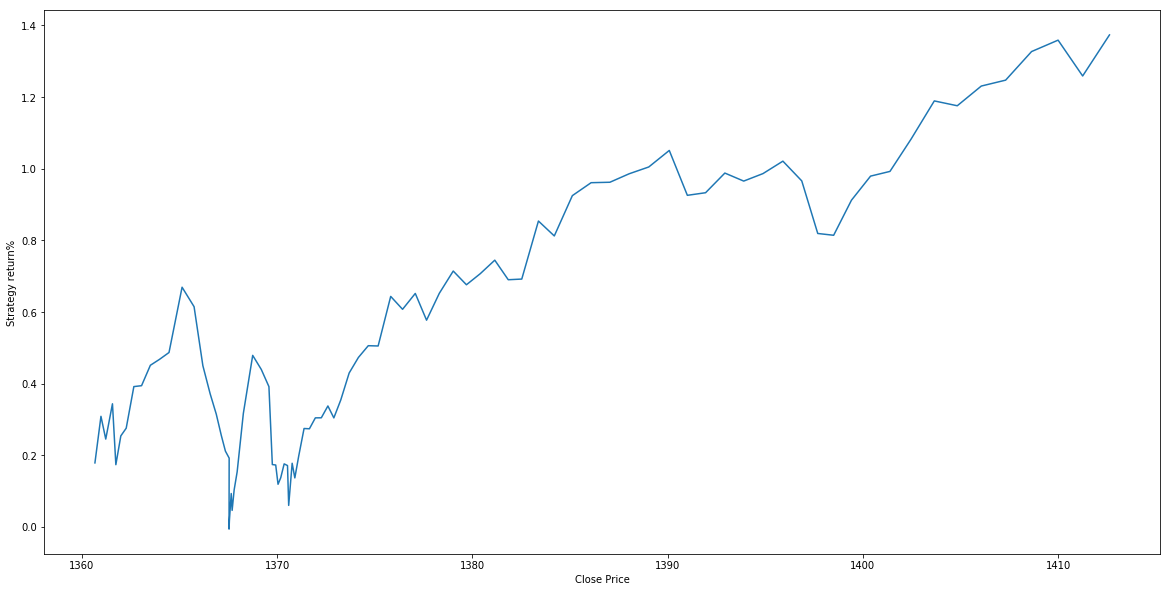

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
df["Close1"] = df["Close Price"]
df["Close2"] = df["Close Price"].shift(1).fillna(0)
df["Close%"] = (df["Close1"]-df["Close2"])
dff = df.dropna()
fig = plt.figure(figsize = (20,10))
a = dff["Close%"].rolling(400).mean()
b = dff["Close Price"].rolling(400).mean()
plt.plot(b,a)
plt.xlabel("Close Price")
plt.ylabel("Strategy return%")
plt.show()
